<a href="https://colab.research.google.com/github/mnaaz-learn/German-credit-risk-Dashboards/blob/main/german_credit_data_pipelining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
uploaded = files.upload()


Saving german.data to german.data


In [ ]:
import pandas as pd

# Column names based on UCI documentation
column_names = [
    'Status_Checking_Account',
    'Duration_Month',
    'Credit_History',
    'Purpose',
    'Credit_Amount',
    'Savings_Account_Bonds',
    'Employment',
    'Installment_Rate_Percent',
    'Personal_Status_Sex',
    'Other_Debtors_Guarantors',
    'Present_Residence_Since',
    'Property',
    'Age',
    'Other_Installment_Plans',
    'Housing',
    'Number_Credits',
    'Job',
    'People_Maintained',
    'Telephone',
    'Foreign_Worker',
    'Credit_Risk'  # 1 = Good, 2 = Bad
]

# Load dataset
df = pd.read_csv("german.data", sep=' ', header=None, names=column_names)

# Preview the data
df.head()


,Status_Checking_Account,Duration_Month,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate_Percent,Personal_Status_Sex,Other_Debtors_Guarantors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker,Credit_Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
df.isnull().sum()


,0
Status_Checking_Account,0
Duration_Month,0
Credit_History,0
Purpose,0
Credit_Amount,0
Savings_Account_Bonds,0
Employment,0
Installment_Rate_Percent,0
Personal_Status_Sex,0
Other_Debtors_Guarantors,0


In [ ]:
df['Credit_Risk'] = df['Credit_Risk'].map({1: 'Good', 2: 'Bad'})

In [ ]:
df.head()

,Status_Checking_Account,Duration_Month,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate_Percent,Personal_Status_Sex,Other_Debtors_Guarantors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker,Credit_Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad


In [ ]:
df.groupby('Credit_Risk')['Credit_Amount'].mean()

,Credit_Amount
Credit_Risk,
Bad,3938.126667
Good,2985.457143


In [ ]:
df['Credit_Risk'].value_counts()

,count
Credit_Risk,
Good,700
Bad,300


In [ ]:
df.groupby('Job')['Credit_Amount'].mean()

,Credit_Amount
Job,
A171,2745.136364
A172,2358.520000
A173,3070.965079
A174,5435.493243


In [ ]:
df.groupby('Credit_Risk')['Duration_Month'].mean()

,Duration_Month
Credit_Risk,
Bad,24.860000
Good,19.207143


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # optional, useful for prettier charts

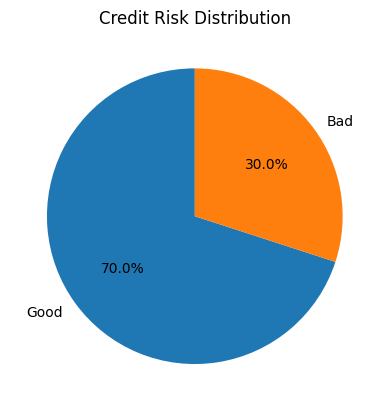

In [ ]:
df['Credit_Risk'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Credit Risk Distribution')
plt.ylabel('')
plt.show()

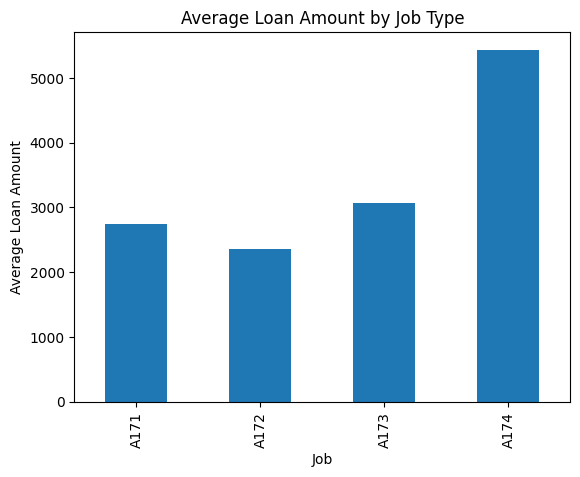

In [ ]:
df.groupby('Job')['Credit_Amount'].mean().plot(kind='bar')
plt.title('Average Loan Amount by Job Type')
plt.xlabel('Job')
plt.ylabel('Average Loan Amount')
plt.show()

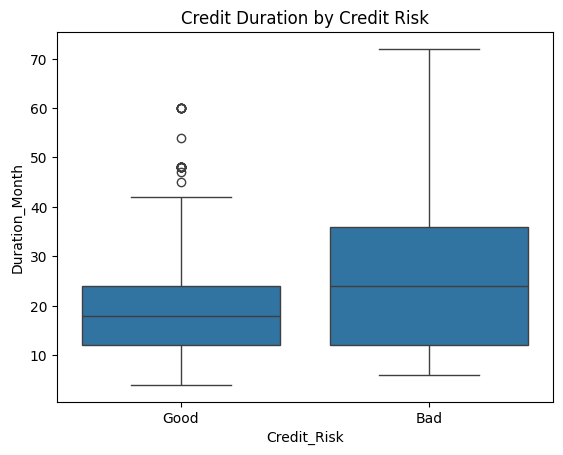

In [ ]:
sns.boxplot(data=df, x='Credit_Risk', y='Duration_Month')
plt.title('Credit Duration by Credit Risk')
plt.show()

In [ ]:
df['Job']=df['Job'].map({
    'A171':'unskilled/unemployeed(non-resident)',
    'A172':'unskilled(resident)',
    'A173':'skilled employee/official',
    'A174':'Management/self-employed/highly skilled'})

In [ ]:
df.to_csv('cleaned_credit_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('cleaned_credit_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv("cleaned_credit_data.csv")

In [ ]:
if 'Customer_ID' not in df.columns:
    df['Customer_ID'] = "CUST_" + df.index.astype(str)

In [ ]:
if 'Credit_Risk' not in df.columns and 'Default_Status' in df.columns:
    df['Credit_Risk'] = df['Default_Status'].map({0: 'Good', 1: 'Bad'})

In [ ]:
if 'Credit_Score' in df.columns:
    def risk_band(score):
        if score >= 700:
            return 'Excellent'
        elif score >= 650:
            return 'Good'
        elif score >= 600:
            return 'Fair'
        else:
            return 'Poor'

    df['Credit_Score_Band'] = df['Credit_Score'].apply(risk_band)


In [ ]:
df.head()

,Status_Checking_Account,Duration_Month,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate_Percent,Personal_Status_Sex,Other_Debtors_Guarantors,...,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker,Credit_Risk,Customer_ID
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,skilled employee/official,1,A192,A201,Good,CUST_0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,skilled employee/official,1,A191,A201,Bad,CUST_1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,unskilled(resident),2,A191,A201,Good,CUST_2
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,skilled employee/official,2,A191,A201,Good,CUST_3
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,skilled employee/official,2,A191,A201,Bad,CUST_4


In [ ]:
df.to_csv('credit_data_for_powerbi.csv', index=False)

In [ ]:
from google.colab import files
files.download('credit_data_for_powerbi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>